In [315]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import statsmodels.api as sm
import pylab
from statsmodels.stats import *
import scipy
from sklearn import svm
from scipy import stats
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso


In [316]:

etf_list = ['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU']

prices_df = pd.DataFrame()

for etf in etf_list:
    df = yf.download(etf, start='2014-01-02', end='2019-12-31', progress=False)
    df[etf] = df['Adj Close']
    prices_df = pd.concat([prices_df, df[etf]], axis = 1)

prices_df.head(10)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU
2014-01-02 00:00:00,NaN,60.454964,35.207253,66.751213,15.416534,49.134388,44.748779,39.801613,NaN,31.702387,29.480881
2014-01-03 00:00:00,NaN,60.291382,35.140892,66.506401,15.522905,49.250248,44.870358,39.706131,NaN,31.550104,29.386269
2014-01-06 00:00:00,NaN,59.918755,35.008198,66.598221,15.537092,49.045250,44.609833,39.489105,NaN,31.496344,29.433573
2014-01-07 00:00:00,NaN,60.282303,35.198952,67.103149,15.544182,49.562172,44.887714,39.419666,NaN,31.783010,29.693773
2014-01-08 00:00:00,NaN,60.118694,34.933544,66.636452,15.593819,49.998878,44.809570,39.654037,NaN,31.783010,29.536076
2014-01-09 00:00:00,NaN,60.109608,35.116016,66.429909,15.650552,50.373207,45.026665,39.497784,NaN,31.576982,29.709538
2014-01-10 00:00:00,NaN,60.291382,35.165783,66.483444,15.622190,50.569286,45.096142,39.619328,NaN,31.639675,30.135307
2014-01-13 00:00:00,NaN,59.082638,34.966724,65.159897,15.388172,50.159306,44.549053,39.081112,NaN,31.299278,29.827808
2014-01-14 00:00:00,NaN,59.591591,35.149185,66.009117,15.515816,50.792095,45.017990,39.628002,NaN,31.827797,29.867243
2014-01-15 00:00:00,NaN,59.736992,35.157467,65.817856,15.700191,50.747532,45.339294,39.871059,NaN,32.212990,29.812037


In [317]:
# 1.2 Obtain US equity prices, we decided to use the Vanguard Growth ETF (Ticker: VUG)

fund = yf.download('VUG', start='2014-01-02', end='2019-12-31', progress=False)
df['VUG'] = df['Adj Close']
prices_df = pd.concat([prices_df, df['VUG']], axis = 1)

prices_df.head(10)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VUG
2014-01-02 00:00:00,NaN,60.454964,35.207253,66.751213,15.416534,49.134388,44.748779,39.801613,NaN,31.702387,29.480881,29.480881
2014-01-03 00:00:00,NaN,60.291382,35.140892,66.506401,15.522905,49.250248,44.870358,39.706131,NaN,31.550104,29.386269,29.386269
2014-01-06 00:00:00,NaN,59.918755,35.008198,66.598221,15.537092,49.045250,44.609833,39.489105,NaN,31.496344,29.433573,29.433573
2014-01-07 00:00:00,NaN,60.282303,35.198952,67.103149,15.544182,49.562172,44.887714,39.419666,NaN,31.783010,29.693773,29.693773
2014-01-08 00:00:00,NaN,60.118694,34.933544,66.636452,15.593819,49.998878,44.809570,39.654037,NaN,31.783010,29.536076,29.536076
2014-01-09 00:00:00,NaN,60.109608,35.116016,66.429909,15.650552,50.373207,45.026665,39.497784,NaN,31.576982,29.709538,29.709538
2014-01-10 00:00:00,NaN,60.291382,35.165783,66.483444,15.622190,50.569286,45.096142,39.619328,NaN,31.639675,30.135307,30.135307
2014-01-13 00:00:00,NaN,59.082638,34.966724,65.159897,15.388172,50.159306,44.549053,39.081112,NaN,31.299278,29.827808,29.827808
2014-01-14 00:00:00,NaN,59.591591,35.149185,66.009117,15.515816,50.792095,45.017990,39.628002,NaN,31.827797,29.867243,29.867243
2014-01-15 00:00:00,NaN,59.736992,35.157467,65.817856,15.700191,50.747532,45.339294,39.871059,NaN,32.212990,29.812037,29.812037


In [318]:
# Computing daily returns for all funds

etf_list.append(['VUG'])

returns_df = pd.DataFrame()

for etf in etf_list:
    returns = np.log(prices_df[etf]/prices_df[etf].shift(1)).dropna()
    returns_df = pd.concat([returns_df, returns], axis = 1)

returns_df.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VUG
2014-01-03 00:00:00,NaN,-0.002710,-0.001887,-0.003674,0.006876,0.002355,0.002713,-0.002402,NaN,-0.004815,-0.003214,-0.003214
2014-01-06 00:00:00,NaN,-0.006200,-0.003783,0.001380,0.000914,-0.004171,-0.005823,-0.005481,NaN,-0.001705,0.001608,0.001608
2014-01-07 00:00:00,NaN,0.006049,0.005434,0.007553,0.000456,0.010485,0.006210,-0.001760,NaN,0.009060,0.008801,0.008801
2014-01-08 00:00:00,NaN,-0.002718,-0.007569,-0.006979,0.003188,0.008773,-0.001742,0.005928,NaN,0.000000,-0.005325,-0.005325
2014-01-09 00:00:00,NaN,-0.000151,0.005210,-0.003104,0.003632,0.007459,0.004833,-0.003948,NaN,-0.006503,0.005856,0.005856


In [319]:
#LASSO
#Run a LASSO regression using your equity fund as the y variable, and up to the 4 or 5 best SPDR ETFs as potential explanatory variables.

target_column = ['VUG'] 
predictors = ['XLE', 'XLP', 'XLI', 'XLK', 'XLU'] 
#list(set(list(returns_df.columns))-set(target_column))
returns_df[predictors] = returns_df[predictors]/returns_df[predictors].max()
returns_df.describe()

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VUG
count,385.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1063.000000,1508.000000,1508.000000,1508.000000
mean,0.000217,0.000476,0.012593,-0.001935,0.000439,0.000471,0.008444,0.000268,0.000369,0.011830,0.018595,0.000494
std,0.011826,0.009232,0.250882,0.217265,0.010361,0.009406,0.207988,0.010228,0.009137,0.180366,0.332298,0.008836
min,-0.048823,-0.040761,-1.270162,-1.100034,-0.055068,-0.045321,-1.020549,-0.044622,-0.054449,-0.883079,-1.606290,-0.042713
25%,-0.004677,-0.004105,-0.116741,-0.116807,-0.004439,-0.004164,-0.088833,-0.005227,-0.003996,-0.065353,-0.159008,-0.004228
50%,0.001085,0.001150,0.015489,0.002447,0.000813,0.000917,0.018083,0.000708,0.000990,0.017546,0.046282,0.001231
75%,0.006498,0.005576,0.159990,0.117612,0.006288,0.005832,0.125227,0.006223,0.005755,0.107183,0.220690,0.005868
max,0.054675,0.057563,1.000000,1.000000,0.044276,0.042694,1.000000,0.043809,0.032915,1.000000,1.000000,0.026591


In [320]:
X = returns_df[predictors].values
y = returns_df[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.40, random_state=40)
print(X_train.shape); print(X_test.shape)

(904, 5)
(604, 5)


In [321]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.008825609932651768
0.0
0.008848823316453008
-0.0023654195385858223


In [322]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

Text(0.5, 1.0, 'Correlation between different indices')

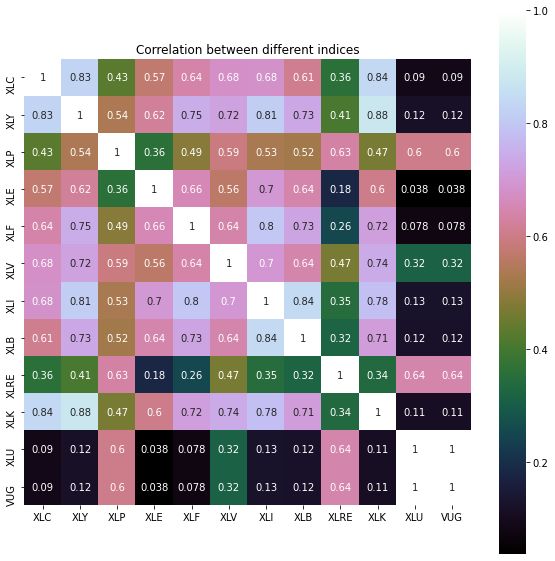

In [323]:
#PCA
#Run a PCA regression using the CORRELATION matrix of 11 Select SPDRs.  Transform the explanatory space from 11 dimensions to a smaller number, based on the consolidation of variance explained in the first N components.

clean_dataset(returns_df)
correlation = returns_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different indices')

In [324]:

stock_ret = returns_df.pct_change()[1:]
print(stock_ret.round(4))


                XLC      XLY     XLP      XLE     XLF      XLV      XLI  \
2018-06-21  -1.4985  -2.5112  0.9971  -5.2420  0.1461  -3.7273 -19.5127   
2018-06-22  -1.7103  -0.7614  3.1787  -2.0570  0.6312  -1.7760  -1.2730   
2018-06-25  -5.7661  11.8880 -0.3850  -2.0275  1.2482  -3.0575  -4.6970   
2018-06-26  -1.0796  -1.3247 -1.8458  -1.6183 -0.6874  -0.6646  -1.2948   
2018-06-27  -6.2873  -2.8259 -0.4984   0.0614  2.6955   1.7466  -3.1529   
...             ...      ...     ...      ...     ...      ...      ...   
2019-12-23  -1.8381  -2.5269 -1.5699   0.0700 -2.9454  -0.4353   0.7848   
2019-12-24  -0.9284  -1.9655 -1.2967  -1.0474 -2.0000  -1.3166  -1.4915   
2019-12-26 -41.8349   4.3896 -0.2508  -0.3330  1.4191  -0.4610  -1.5763   
2019-12-27  -1.2432  -1.0065  3.6538  12.0288 -1.4699  -1.4286  -1.3682   
2019-12-30   4.6345  80.4034 -2.1791  -0.2486  0.1281 -21.6606   4.4427   

               XLB    XLRE      XLK     XLU     VUG  
2018-06-21  2.2861 -0.4458  -4.6771  3.2417  

In [325]:
def assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)

In [326]:
from sklearn.decomposition import PCA
num_pc = 6

stock_ret.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_ret.fillna(-0.01, inplace=True)

X = np.asarray(stock_ret)
[n,m] = X.shape

print(X[~np.isnan(X).any(axis=1)])


print('The number of timestamps is {}.'.format(n))
print('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage = pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 4 PCA'.format(percentage_cum[-1]*100))


[[ -1.49845829  -2.51123537   0.99706844 ...  -4.67709089   3.24172942
    3.24172942]
 [ -1.71031468  -0.7614401    3.17871968 ...  -0.57949573   1.04813413
    1.04813413]
 [ -5.76609857  11.88804046  -0.38502873 ...   5.46882785   1.37214397
    1.37214397]
 ...
 [-41.83489165   4.38963957  -0.25077296 ...  21.58078674   0.22039941
    0.22039941]
 [ -1.24319872  -1.00652848   3.65382081 ...  -1.01465854   0.72314221
    0.72314221]
 [  4.63448509  80.40337876  -2.17906182 ...  52.13383713  -1.05252516
   -1.05252516]]
The number of timestamps is 384.
The number of stocks is 12.
83.03% of the variance is explained by the first 4 PCA


(50.0, 100.0)

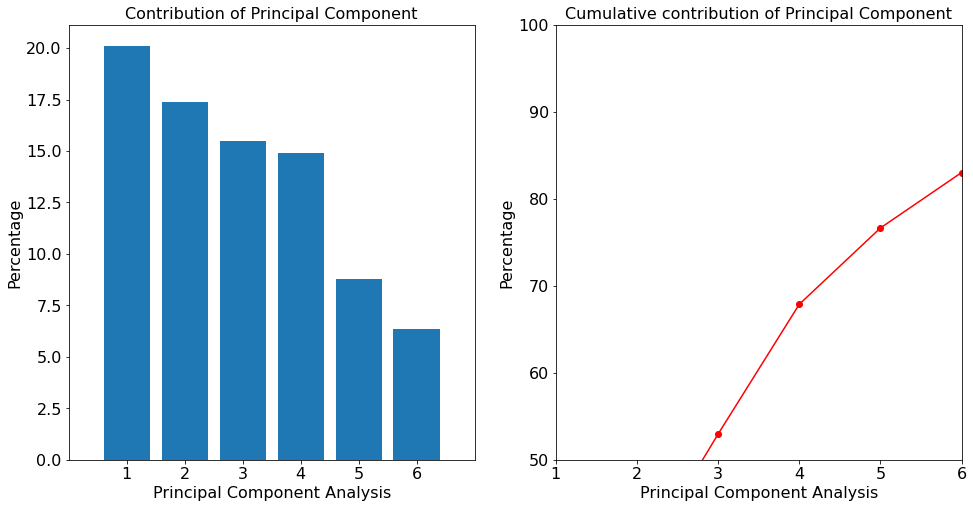

In [327]:
pca_components = pca.components_
x = np.arange(1,len(percentage)+1,1)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of Principal Component',fontsize = 16)
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.title('Cumulative contribution of Principal Component',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100])

In [328]:
# Statistical risk factors
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2", "factor 3","factor 4","factor 5","factor 6"], 
                              index=stock_ret.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2,factor 3,factor 4,factor 5,factor 6
2018-06-21 00:00:00,1.171501,2.170002,7.734659,-3.886562,-4.998146,-5.477459
2018-06-22 00:00:00,-0.315157,0.348602,1.272685,-1.814401,-3.061014,0.699221
2018-06-25 00:00:00,5.054616,-11.203913,-4.580679,-3.291448,-1.249490,-2.042435
2018-06-26 00:00:00,-1.320420,0.896433,1.217488,-0.306450,0.565539,-3.347149
2018-06-27 00:00:00,2.846515,2.851033,6.058518,1.454832,0.653542,0.672179


In [329]:
factor_exposures = pd.DataFrame(index=["Portfolio 1", "Portfolio 2", "Portfolio 3","Portfolio 4","Portfolio 5","Portfolio 6"], 
                                columns=stock_ret.columns,
                                data = pca.components_).T

In [330]:
factor_exposures

,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4,Portfolio 5,Portfolio 6
XLC,0.024515,0.055608,-0.082343,0.004491,-0.001095,-0.045353
XLY,0.201858,-0.972706,-0.078526,0.046358,0.032729,-0.005294
XLP,-0.389562,-0.083514,-0.045059,0.021418,-0.559772,0.549579
XLE,-0.047920,0.006717,-0.071848,-0.014666,0.557835,0.734134
XLF,0.229552,0.085783,-0.028654,-0.042145,0.489132,0.000311
XLV,0.132488,0.079598,-0.068091,0.984108,-0.017144,0.037027
XLI,0.018876,-0.003486,-0.055936,0.007169,0.033501,0.164367
XLB,-0.005543,0.029172,0.028783,-0.016653,-0.018187,-0.058071
XLRE,0.066819,0.009406,0.014108,-0.034080,-0.073174,0.216799
XLK,0.225262,0.110027,-0.946091,-0.108885,-0.131919,-0.007480


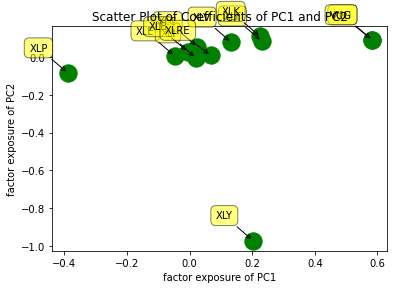

In [331]:
labels = factor_exposures.index
data = factor_exposures.values

plt.figure(figsize=(6,4))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

In [332]:
# Run another PCA regression using the COVARIANCE matrix of 11 Select SPDRs.  Transform the explanatory space from 11 dimensions to a smaller number, based on the consolidation of variance explained in the first N components.

from sklearn.decomposition import PCA
num_pc = 4

stock_ret.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_ret.fillna(-0.01, inplace=True)

X = np.asarray(stock_ret)
[n,m] = X.shape

print(X[~np.isnan(X).any(axis=1)])


print('The number of timestamps is {}.'.format(n))
print('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage = pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 4 PCA'.format(percentage_cum[-1]*100))


[[ -1.49845829  -2.51123537   0.99706844 ...  -4.67709089   3.24172942
    3.24172942]
 [ -1.71031468  -0.7614401    3.17871968 ...  -0.57949573   1.04813413
    1.04813413]
 [ -5.76609857  11.88804046  -0.38502873 ...   5.46882785   1.37214397
    1.37214397]
 ...
 [-41.83489165   4.38963957  -0.25077296 ...  21.58078674   0.22039941
    0.22039941]
 [ -1.24319872  -1.00652848   3.65382081 ...  -1.01465854   0.72314221
    0.72314221]
 [  4.63448509  80.40337876  -2.17906182 ...  52.13383713  -1.05252516
   -1.05252516]]
The number of timestamps is 384.
The number of stocks is 12.
67.88% of the variance is explained by the first 4 PCA


(50.0, 100.0)

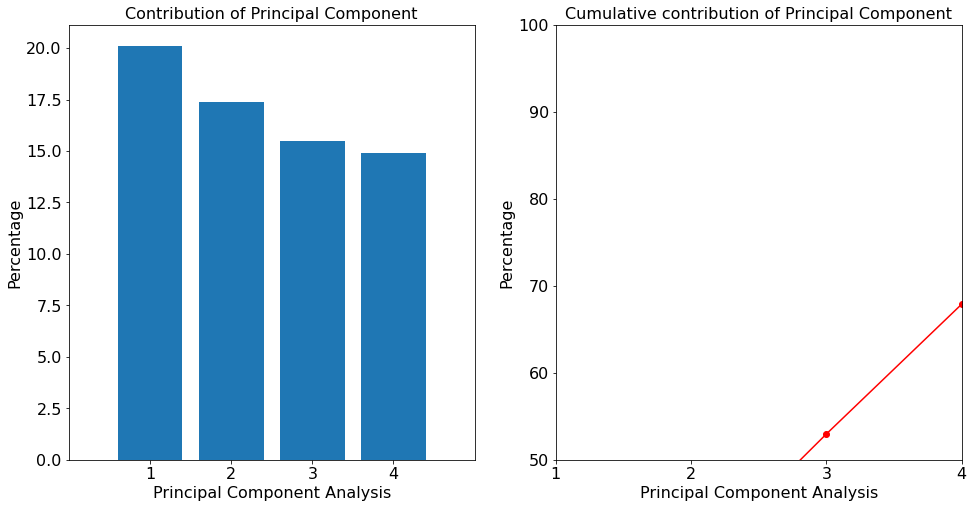

In [333]:
pca_components = pca.components_
x = np.arange(1,len(percentage)+1,1)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of Principal Component',fontsize = 16)
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.title('Cumulative contribution of Principal Component',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100])

In [334]:
# Statistical risk factors
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2", "factor 3","factor 4"], 
                              index=stock_ret.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2,factor 3,factor 4
2018-06-21 00:00:00,1.171501,2.170002,7.734659,-3.886562
2018-06-22 00:00:00,-0.315157,0.348602,1.272685,-1.814401
2018-06-25 00:00:00,5.054616,-11.203913,-4.580679,-3.291448
2018-06-26 00:00:00,-1.320420,0.896433,1.217488,-0.306450
2018-06-27 00:00:00,2.846515,2.851033,6.058518,1.454832


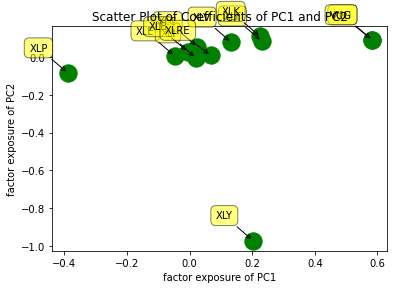

In [335]:
labels = factor_exposures.index
data = factor_exposures.values

plt.figure(figsize=(6,4))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

In [336]:
#Repeat 6.1, 6.2 and 6.3 without using the extreme 5% values of the data.
# Remove outliers based on Z-score
stock_ret_noextrem = stock_ret
stock_ret_noextrem[(np.abs(stats.zscore(stock_ret_noextrem['VUG'])) < 3)]


,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VUG
2018-06-21,-1.498458,-2.511235,0.997068,-5.242004,0.146058,-3.727269,-19.512652,2.286067,-0.445822,-4.677091,3.241729,3.241729
2018-06-22,-1.710315,-0.761440,3.178720,-2.056981,0.631242,-1.776014,-1.272999,-2.352276,0.462943,-0.579496,1.048134,1.048134
2018-06-25,-5.766099,11.888040,-0.385029,-2.027491,1.248206,-3.057460,-4.697004,-2.083999,-1.284834,5.468828,1.372144,1.372144
2018-06-26,-1.079604,-1.324717,-1.845841,-1.618297,-0.687435,-0.664599,-1.294787,-1.243196,-3.122051,-1.192092,-0.929190,-0.929190
2018-06-27,-6.287262,-2.825917,-0.498412,0.061403,2.695529,1.746591,-3.152906,-1.817880,-1.528758,-4.409503,3.153810,3.153810
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,-1.838088,-2.526863,-1.569891,0.069984,-2.945367,-0.435262,0.784770,-0.423979,-1.784347,-0.506866,-2.362221,-2.362221
2019-12-24,-0.928448,-1.965535,-1.296743,-1.047387,-2.000000,-1.316624,-1.491517,-0.589039,-1.217916,-0.884814,-1.150593,-1.150593
2019-12-26,-41.834892,4.389640,-0.250773,-0.333018,1.419148,-0.460955,-1.576264,2.846492,3.582829,21.580787,0.220399,0.220399
2019-12-27,-1.243199,-1.006528,3.653821,12.028834,-1.469901,-1.428607,-1.368190,-1.851581,-0.394268,-1.014659,0.723142,0.723142


In [337]:
#LASSO
target_column = ['VUG'] 
predictors = ['XLE', 'XLP', 'XLI', 'XLK', 'XLU'] 
#list(set(list(returns_df.columns))-set(target_column))
returns_df[predictors] = returns_df[predictors]/returns_df[predictors].max()
returns_df.describe()

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VUG
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,0.000217,0.000348,0.023790,-0.006168,0.000379,0.000550,0.007906,0.000191,0.000653,0.011833,0.032143,0.000772
std,0.011826,0.010581,0.273752,0.214244,0.010544,0.009352,0.235845,0.010634,0.008984,0.224464,0.338862,0.008134
min,-0.048823,-0.036661,-1.065214,-0.684156,-0.044452,-0.034254,-0.954548,-0.033716,-0.038120,-0.883079,-1.779359,-0.042713
25%,-0.004677,-0.004868,-0.115860,-0.122525,-0.004569,-0.003642,-0.091516,-0.006214,-0.004002,-0.080747,-0.145432,-0.003491
50%,0.001085,0.001323,0.031953,0.007589,0.001115,0.001174,0.020281,0.000725,0.001528,0.028364,0.056656,0.001360
75%,0.006498,0.006509,0.186680,0.122500,0.006330,0.005559,0.146401,0.007001,0.006355,0.134378,0.218712,0.005250
max,0.054675,0.057563,1.000000,1.000000,0.044276,0.042694,1.000000,0.043809,0.031371,1.000000,1.000000,0.024005


In [338]:
X = returns_df[predictors].values
y = returns_df[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.40, random_state=40)
print(X_train.shape); print(X_test.shape)

(231, 5)
(154, 5)


In [339]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.008214507291499156
0.0
0.007995044371520524
-0.00592056487391357


Text(0.5, 1.0, 'Correlation between different indices')

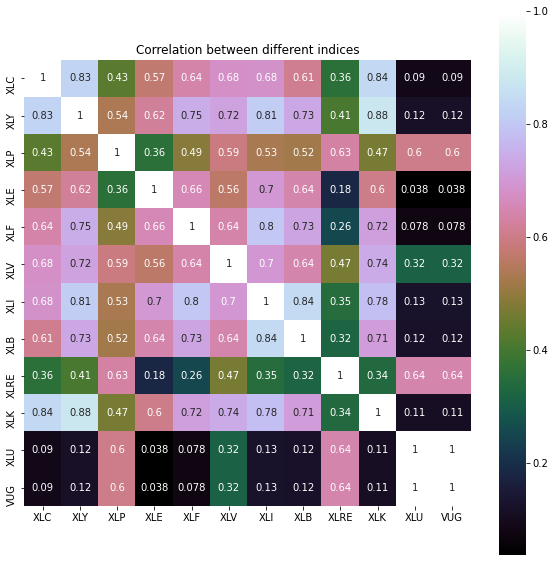

In [340]:
#PCA
returns_df_noextrem = returns_df
returns_df_noextrem[(np.abs(stats.zscore(returns_df_noextrem['VUG'])) < 3)]

clean_dataset(returns_df_noextrem)
correlation = returns_df_noextrem.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different indices')

In [341]:
from sklearn.decomposition import PCA
num_pc = 4

returns_df_extreme.replace([np.inf, -np.inf], np.nan, inplace=True)
returns_df_extreme.fillna(-0.01, inplace=True)

X = np.asarray(stock_ret)
[n,m] = X.shape

print(X[~np.isnan(X).any(axis=1)])


print('The number of timestamps is {}.'.format(n))
print('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage = pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 4 PCA'.format(percentage_cum[-1]*100))


[[ -1.49845829  -2.51123537   0.99706844 ...  -4.67709089   3.24172942
    3.24172942]
 [ -1.71031468  -0.7614401    3.17871968 ...  -0.57949573   1.04813413
    1.04813413]
 [ -5.76609857  11.88804046  -0.38502873 ...   5.46882785   1.37214397
    1.37214397]
 ...
 [-41.83489165   4.38963957  -0.25077296 ...  21.58078674   0.22039941
    0.22039941]
 [ -1.24319872  -1.00652848   3.65382081 ...  -1.01465854   0.72314221
    0.72314221]
 [  4.63448509  80.40337876  -2.17906182 ...  52.13383713  -1.05252516
   -1.05252516]]
The number of timestamps is 384.
The number of stocks is 12.
67.88% of the variance is explained by the first 4 PCA


(50.0, 100.0)

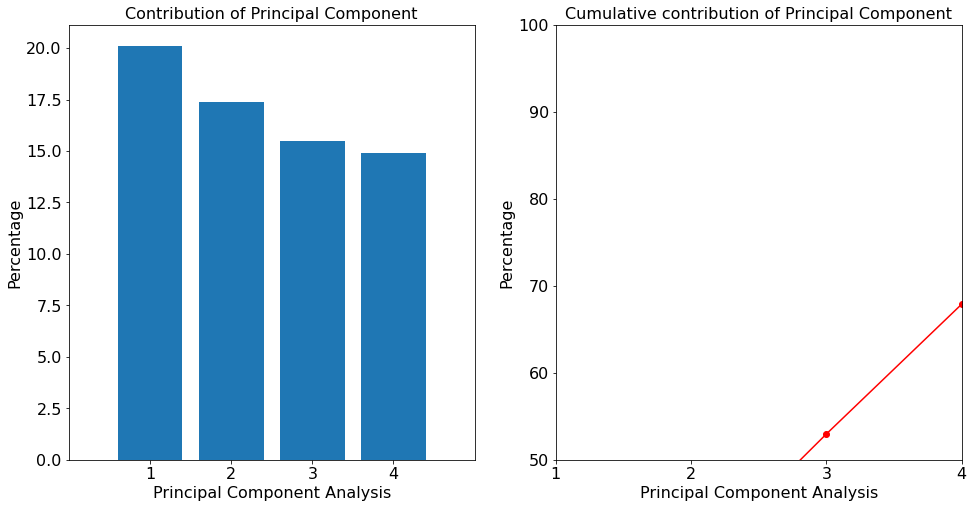

In [342]:
pca_components = pca.components_
x = np.arange(1,len(percentage)+1,1)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of Principal Component',fontsize = 16)
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.title('Cumulative contribution of Principal Component',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100])

In [343]:
# Statistical risk factors
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2", "factor 3","factor 4"], 
                              index=stock_ret.index,
                              data=factor_returns)
factor_returns.head()

factor_exposures = pd.DataFrame(index=["Portfolio 1", "Portfolio 2", "Portfolio 3","Portfolio 4"], 
                                columns=returns_df_extreme.columns,
                                data = pca.components_).T

factor_exposures

,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4
XLC,0.024515,0.055608,-0.082343,0.004491
XLY,0.201858,-0.972706,-0.078526,0.046358
XLP,-0.389562,-0.083514,-0.045059,0.021418
XLE,-0.047920,0.006717,-0.071848,-0.014666
XLF,0.229552,0.085783,-0.028654,-0.042145
XLV,0.132488,0.079598,-0.068091,0.984108
XLI,0.018876,-0.003486,-0.055936,0.007169
XLB,-0.005543,0.029172,0.028783,-0.016653
XLRE,0.066819,0.009406,0.014108,-0.034080
XLK,0.225262,0.110027,-0.946091,-0.108885


In [344]:
"""
Create a training as well as a testing set
"""
def train_test_split(dataset):
    training_data = dataset.iloc[:int(0.7*len(dataset))].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[int(0.7*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(stock_ret)[0]
testing_data = train_test_split(stock_ret)[1] 


In [345]:
# 7.1 Run a regression tree using your equity fund as the y variable, and all SPDR ETFs as potential explanatory variables.

#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor

#Parametrize the model
#We will use the mean squered error == varince as spliting criteria and set the minimum number
#of instances per leaf = 5
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 


#Fit the model
regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])


#Predict unseen query instances
predicted = regression_model.predict(testing_data.iloc[:,:-1])


#Compute and plot the RMSE

RMSE = np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted)**2)/len(testing_data.iloc[:,-1])))
RMSE

7.803662440496797

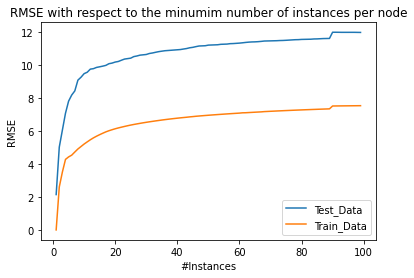

In [346]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_train = []
RMSE_test = []

for i in range(1,100):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    #Predict query instances
    predicted_train = regression_model.predict(training_data.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data.iloc[:,:-1])
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1]))))


   
ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


In [347]:
Y = stock_ret[['VUG']]
X = stock_ret[['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU']]
clf = svm.SVC()


In [348]:
#Simply fit the values of X and Y
clf.fit(X,Y)

/home/muthu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'